In [2]:
# Load all the required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
# Load data from the csv file
raw_loan_data = pd.read_csv('loan.csv', encoding='ISO-8859-1')
raw_loan_data.info()
raw_loan_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


C:\Users\u725949\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(39717, 111)

In [4]:
# Finding Total rows from shape
total_rows = (raw_loan_data.shape)[0]
total_rows

39717

In [5]:
# Finding percentage of null data available in our data
null_data_percentage = 100*(raw_loan_data.isnull().sum()/total_rows)

# Show only data which are having null values >0
null_data_percentage[null_data_percentage != 0]

emp_title                       6.191303
emp_length                      2.706650
desc                           32.580507
title                           0.027696
mths_since_last_delinq         64.662487
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 68, dtype: float64

In [6]:
# Display null data who are having percentage of null 100
null_data_percentage[null_data_percentage == 100]

mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


In [7]:
# Total 100% null data columns
total_100_percent_null_cols = null_data_percentage[null_data_percentage == 100].count()
total_100_percent_null_cols

54

In [8]:
# Since, 100% null data means they dont have anything to help in our analysis. So, lets drop them
# Creating the list of null cols data to drop them
cols_list_to_drop = [
    'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
    'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
    'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
    'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
    'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
    'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
    'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort',
    'total_bc_limit', 'total_il_high_credit_limit'
]

In [9]:
cols_list_to_drop

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [10]:
len(cols_list_to_drop) # Cross check if missed any column

54

In [11]:
# Loop through the columns and drop one by one
for col in cols_list_to_drop:
    raw_loan_data.drop(col, axis=1, inplace=True)
    
raw_loan_data.shape
# Reduced cols from 111 to 57

(39717, 57)

In [12]:
# Lets see remaining null data
null_data_percentage = 100*(raw_loan_data.isnull().sum()/total_rows)
null_data_percentage[null_data_percentage != 0]

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

In [13]:
# lets remove the cols which are having greater than 30% null values and which are not important for our analysis
# Since, we are assuming 30% as threshold to remove null data
cols_list_to_drop = ['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']
for col in cols_list_to_drop:
    raw_loan_data.drop(col, axis=1, inplace=True)
    
raw_loan_data.shape
# Reduced cols from 57 to 53

(39717, 53)

In [14]:
# Lets see remaining null data
null_data_percentage = 100*(raw_loan_data.isnull().sum()/total_rows)
round(null_data_percentage[null_data_percentage != 0], 2)

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [15]:
# emp_title, emp_length, title are categorical and instead of imputing with mode and creating bias among data
# lets remove such rows so that no bias is added and less data will be removed from whole data set
raw_loan_data = raw_loan_data[~raw_loan_data['emp_title'].isnull()]
raw_loan_data = raw_loan_data[~raw_loan_data['emp_length'].isnull()]
raw_loan_data = raw_loan_data[~raw_loan_data['title'].isnull()]

raw_loan_data.shape
# Total rows reduced from 39717 to 37913

(37193, 53)

In [16]:
# Lets see remaining null data
null_data_percentage = 100*(raw_loan_data.isnull().sum()/total_rows)
round(null_data_percentage[null_data_percentage != 0], 2)

revol_util                    0.12
last_pymnt_d                  0.16
collections_12_mths_ex_med    0.12
chargeoff_within_12_mths      0.12
pub_rec_bankruptcies          1.65
tax_liens                     0.08
dtype: float64

In [17]:
raw_loan_data.pub_rec_bankruptcies.value_counts()
# Here data is of kind categorical among 0,1,2. instead of imputing data with 0 and creating bias lets remove that rows

0.0    35030
1.0     1502
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [18]:
raw_loan_data = raw_loan_data[~raw_loan_data['pub_rec_bankruptcies'].isnull()]
raw_loan_data.shape
# Total rows reduced from 37913 to 36539

(36539, 53)

In [19]:
# Lets see remaining null data
null_data_percentage = 100*(raw_loan_data.isnull().sum()/total_rows)
round(null_data_percentage[null_data_percentage != 0], 2)

revol_util                    0.12
last_pymnt_d                  0.16
collections_12_mths_ex_med    0.01
chargeoff_within_12_mths      0.01
dtype: float64

In [20]:
# Since, remaining columns are having very negligable amount of null values lets remove them instead of imputing
# And also they are not having much significance in our analysis
raw_loan_data = raw_loan_data[~raw_loan_data['revol_util'].isnull()]
raw_loan_data = raw_loan_data[~raw_loan_data['last_pymnt_d'].isnull()]
raw_loan_data = raw_loan_data[~raw_loan_data['collections_12_mths_ex_med'].isnull()]
raw_loan_data = raw_loan_data[~raw_loan_data['chargeoff_within_12_mths'].isnull()]

raw_loan_data.shape
# Total rows reduced from 36539 to 36431

(36431, 53)

In [21]:
# Lets see remaining null data
null_data_percentage = 100*(raw_loan_data.isnull().sum()/total_rows)
round(null_data_percentage[null_data_percentage != 0], 2)

Series([], dtype: float64)

In [22]:
# Since there were no null data lets decide the columns that can be responsible/useful for our analysis of finding
# the factors for loan status of 'Charged Off'/'Default'
raw_loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [23]:
raw_loan_data.chargeoff_within_12_mths.value_counts()
# Since all are having single kind of data, this column is not so useful for our analysis. So lets drop it

0.0    36431
Name: chargeoff_within_12_mths, dtype: int64

In [24]:
raw_loan_data.acc_now_delinq.value_counts()
# Sicne all are having same kind of data, this column is not so useful for our analysis. So, lets droip it

0    36431
Name: acc_now_delinq, dtype: int64

In [25]:
# Since following are the columns which doesnt show any impact on our analysis and doesn't useful in our analysis
cols_list_to_drop = [
    'id', 'member_id', 'pymnt_plan',
    'url', 'zip_code', 'initial_list_status', 'policy_code', 'application_type',
    'earliest_cr_line', 'revol_bal', 'revol_util',
    'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med',
    'tax_liens', 'delinq_amnt', 'inq_last_6mths', 'title', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'acc_now_delinq'
]
for col in cols_list_to_drop:
    raw_loan_data.drop(col, axis=1, inplace=True)
    
raw_loan_data.shape
# Reduced cols from 53 to 23

(36431, 23)

In [26]:
raw_loan_data.columns # 23 Columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'open_acc', 'pub_rec', 'total_acc', 'total_pymnt'],
      dtype='object')

In [27]:
# Finding count of no.of rows available for each loan status type
raw_loan_data.loan_status.value_counts()

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

In [28]:
# Since we need to analysze data on loan_status of 'Fully Paid' and 'Charged Off' 
# Lets remove rows having the loan status of 'Current' [It was mentioned current means they are paying and not charged off yet]
raw_loan_data = raw_loan_data[raw_loan_data.loan_status != 'Current']
raw_loan_data.loan_status.value_counts()

Fully Paid     30423
Charged Off     4942
Name: loan_status, dtype: int64

In [29]:
raw_loan_data.shape
# Rows reduced from 36431 to 35365

(35365, 23)

In [30]:
# Cleaning data for columns emp_length, term
# Since, emp_length is having data like 10+, <1, so, lets remove them and make everything as String
raw_loan_data['emp_length'] = raw_loan_data['emp_length'].apply(lambda x : ("".join(filter(str.isdigit, str(x)))))
raw_loan_data['emp_length'].value_counts()

10    8028
1     6937
2     4081
3     3833
4     3206
5     3043
6     2062
7     1638
8     1361
9     1176
Name: emp_length, dtype: int64

In [31]:
# Lets make term as integer/string and lets remove the months from it
raw_loan_data['term'] = raw_loan_data['term'].apply(lambda x : x.split()[0])
raw_loan_data['term'].value_counts()

36    26375
60     8990
Name: term, dtype: int64

In [32]:
# Deriving new columns from existing columns
# Lets create a new issue_year column from the issue_d so, that we can analyze data based on year
raw_loan_data['issue_year'] = raw_loan_data['issue_d'].apply(lambda x:datetime.datetime.strptime(x, '%b-%y').year)
raw_loan_data['issue_year'].value_counts()

2011    19090
2010    10795
2009     4423
2008     1053
2007        4
Name: issue_year, dtype: int64

In [33]:
# Creating Loan to annual income variable, which helps in derving the people based on the income and his loan expenditure
# People with less income and more expenditure are most likely to default. So, to confirm it lets derive this variable from it
raw_loan_data['l_t_ai'] = round(raw_loan_data['loan_amnt']/raw_loan_data['annual_inc'],2);
raw_loan_data['l_t_ai']

1        0.08
3        0.20
5        0.14
6        0.15
7        0.06
         ... 
39433    0.08
39475    0.12
39551    0.15
39562    0.14
39623    0.23
Name: l_t_ai, Length: 35365, dtype: float64

In [34]:
#Create Derived categorical variable income bin so that we can derive more insights based on the range of income
raw_loan_data['income_bin'] = raw_loan_data['annual_inc']/20000
raw_loan_data['income_bin'] = raw_loan_data['income_bin'].astype(int)
raw_loan_data['income_bin']

1        1
3        2
5        1
6        2
7        2
        ..
39433    4
39475    5
39551    4
39562    1
39623    1
Name: income_bin, Length: 35365, dtype: int32

In [35]:
raw_loan_data.shape

(35365, 26)

In [36]:
#Copy data to a new data frame naming master
master = raw_loan_data.copy(deep=True) # deep=True, to make sure they are not linked to each other such that if one changes other will not get effected
master.shape

(35365, 26)

In [37]:
master.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'open_acc', 'pub_rec', 'total_acc', 'total_pymnt', 'issue_year',
       'l_t_ai', 'income_bin'],
      dtype='object')

### Univarient Analysis

In [38]:
### Got from Internet for using it as a common method to plot the graphs

# Plotting average overall default rate
sns.set(style="darkgrid")
def plt_frequency_graphs(x_var, data_df, x_label, title, hue_var=None, rot_flag=0, fig_size_x=15, fig_size_y=6):
    ncount = len(master)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

In [39]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

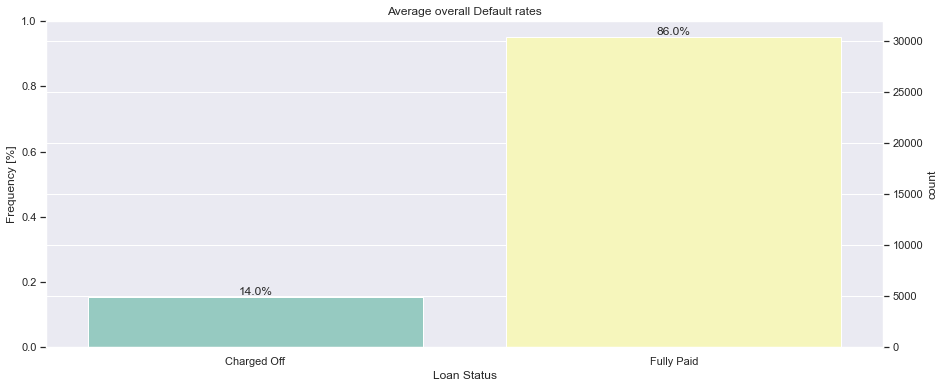

In [40]:
# Graphs for different columns with respect to its frequency
# Plotting these graphs to make sure what range/kind of data is available in our dataset for that particular column
plt_frequency_graphs("loan_status",master,'Loan Status','Average overall Default rates')

##### Frequency of Chargedoff people are less when compared to Fully paid people in loan data

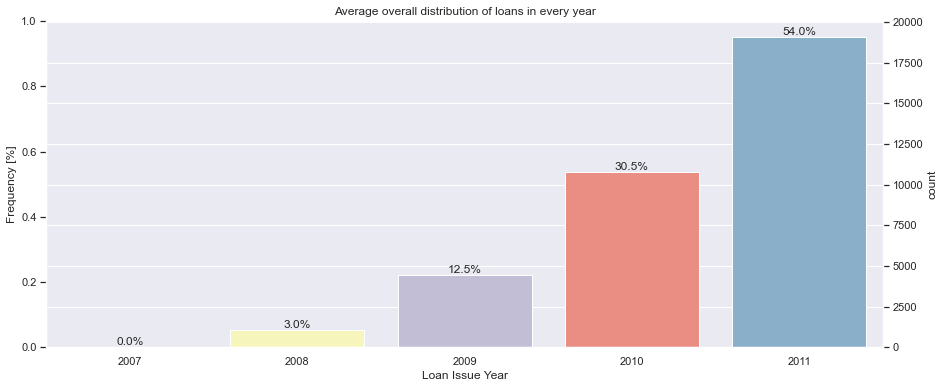

In [41]:
plt_frequency_graphs("issue_year",master,'Loan Issue Year','Average overall distribution of loans in every year')

#### People started taking loan from year 2008 and increasing it year by year 

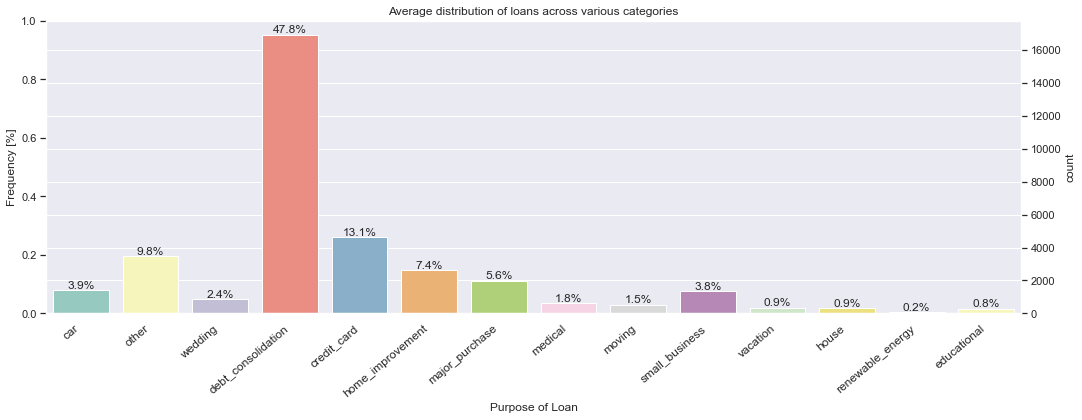

In [42]:
plt_frequency_graphs("purpose",master,'Purpose of Loan','Average distribution of loans across various categories',None,1)

#### People taking loan specifically with a purpose of 'debit_consolidation', 'credit_card', 'other' frequently.

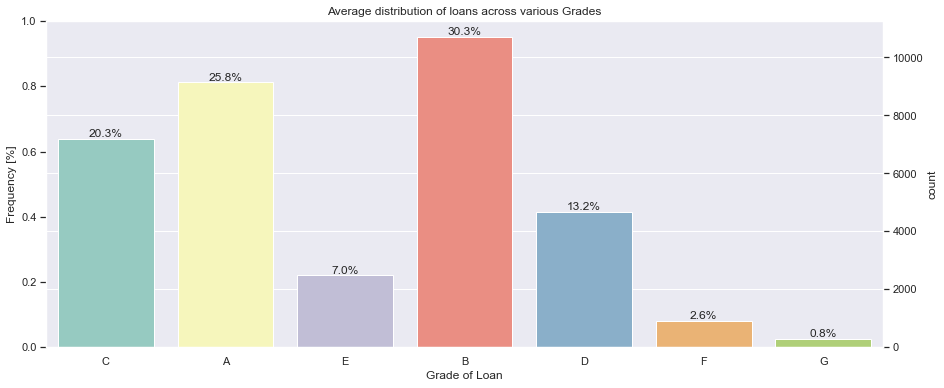

In [43]:
plt_frequency_graphs("grade",master,'Grade of Loan','Average distribution of loans across various Grades')

#### People having grades B,A,C are taking loans frequently

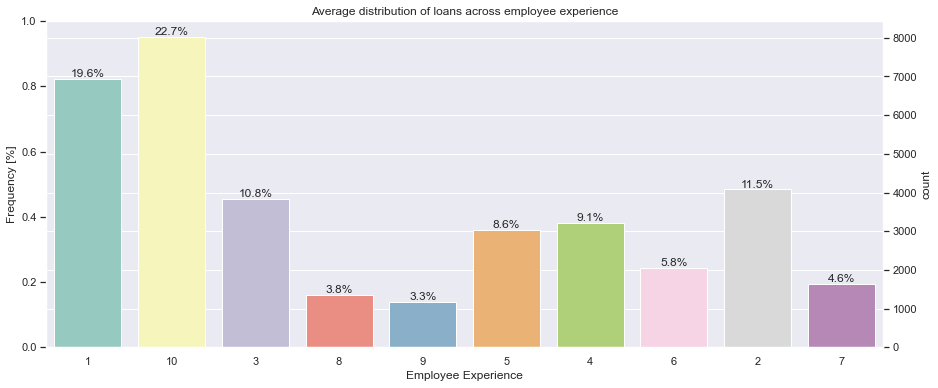

In [44]:
plt_frequency_graphs("emp_length",master,'Employee Experience','Average distribution of loans across employee experience')

#### People having >=10 years of experience or having <=1 year of experience are taking loans frequenctly. Lending club should need to take care while giving loans for less experience people since, they have more chances of default

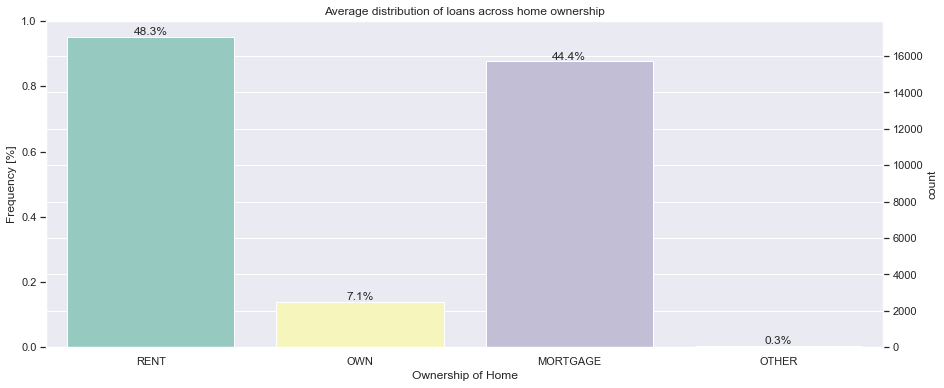

In [45]:
plt_frequency_graphs("home_ownership",master,'Ownership of Home','Average distribution of loans across home ownership')

##### People with rented & mortgage home are taking loans frequently, which may cause more chances of default

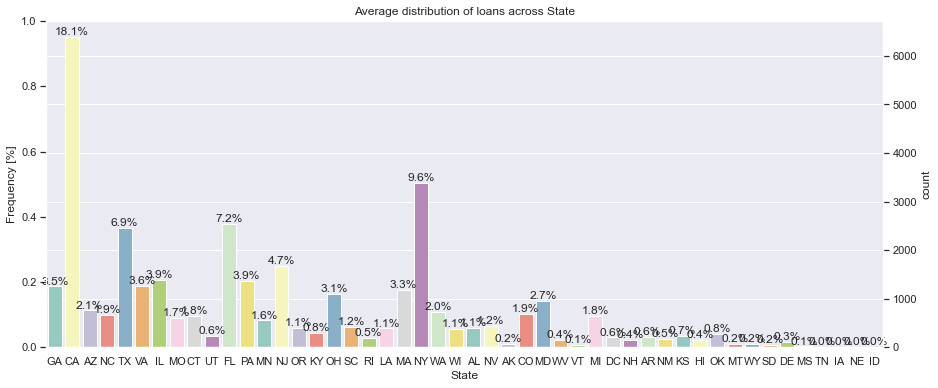

In [46]:
plt_frequency_graphs("addr_state",master,'State','Average distribution of loans across State')

#### People from states 'CA', 'NY', 'FL' area people are taking loans frequently

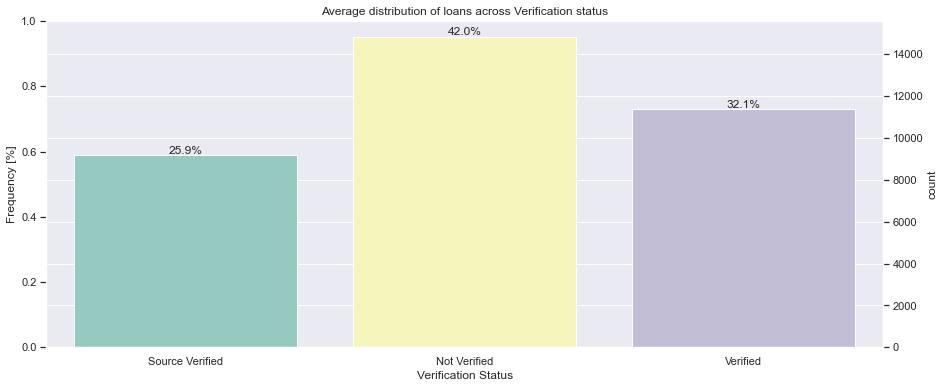

In [47]:
plt_frequency_graphs("verification_status",master,'Verification Status','Average distribution of loans across Verification status')

#### Around 42% of loans are Not Verified, in the means that without any Background verification, credit verification etc loans are assigning to the people which may cause the chances of default  

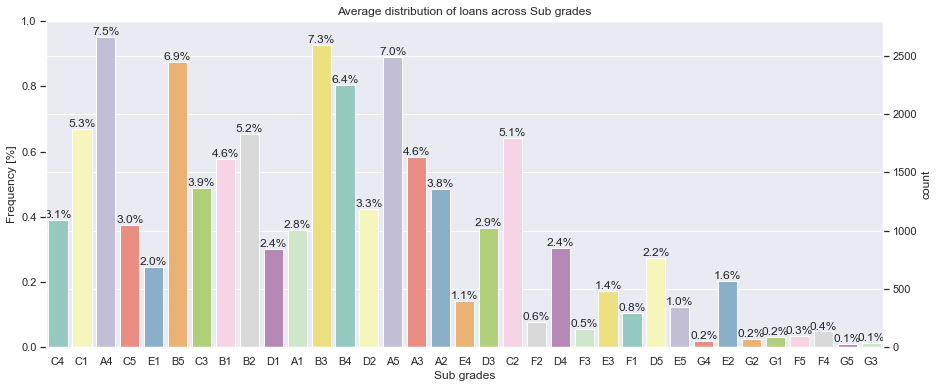

In [48]:
plt_frequency_graphs("sub_grade",master,'Sub grades','Average distribution of loans across Sub grades')

#### People with subgrades A4, B3, A2 are getting loans frequently

In [49]:
### Lets make dti, l_t_ai and emp_length as categorical variables for better understanding of insights
def dti_range(dti):
    if dti <= 10.00:
        return 'low'
    elif (dti >10.00 and dti <= 20.00):
        return 'medium'
    else:
        return 'high'

def loan_to_income_range(l_t_ai):
    if l_t_ai <= 0.10:
        return 'low'
    elif (l_t_ai >0.10 and l_t_ai <= 0.20):
        return 'medium'
    else:
        return 'high'

def emp_length_range(emp_length):
    if emp_length <= 3:
        return 'Junior'
    elif (emp_length >3 and emp_length <= 7):
        return 'Senior'
    else:
        return 'Specialist'

master['dti_range'] = master['dti'].apply(lambda x : dti_range(x) )
master['l_t_ai_range'] = master['l_t_ai'].apply(lambda x : loan_to_income_range(x) )
master['exp_level'] = master['emp_length'].apply(lambda x : emp_length_range(int(x)))

# Changing intrest rate from string to float
master['int_rate_float'] = master['int_rate'].apply(lambda x : float(x.replace('%','')))

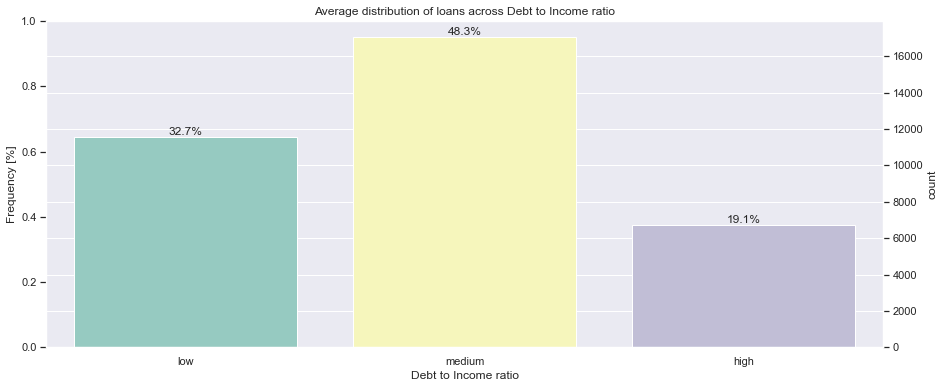

In [50]:
plt_frequency_graphs("dti_range",master,'Debt to Income ratio','Average distribution of loans across Debt to Income ratio')

#### People with medium Debt to Income ratio are getting loans frequently

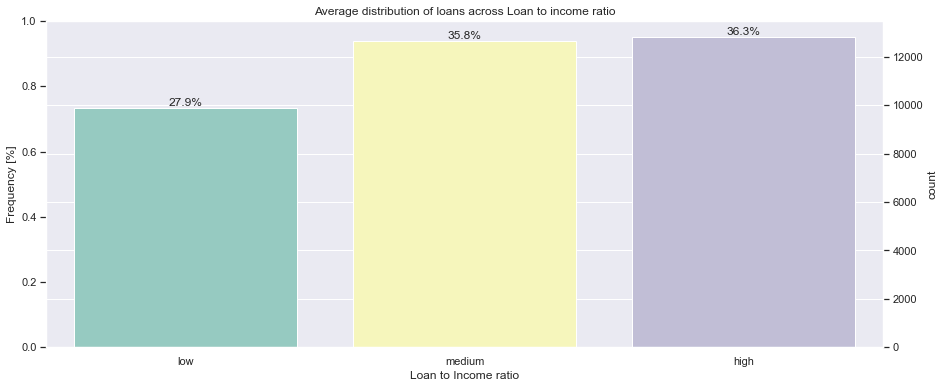

In [51]:
plt_frequency_graphs("l_t_ai_range",master,'Loan to Income ratio','Average distribution of loans across Loan to income ratio')

#### People with High,Medium Loan to Income ratio are getting loans frequently which may cause the high chances of default

##### Overall observations from above graphs
    1. 86% of data are Full Paid
    2. No.of loans are increasing every year
    3. Loans taken for debt_consolidation, credit_card, other, home_improvement, major_purchase, car, small_business, medical, moving are top 9
    4. Loans taken by A,B,C grades are more than other grades
    5. Employees with experience 1, 10 are taking more loans
    6. People living in houses which are 'Rented', 'Mortgage' are taken more loans
    7. More amount of loans are taken from states 'CA', 'NY'
    8. More loans are taken without any verification
    9. Different sub grades data is distributed while taking the loans
    10. People with medium debt to income ratio are frequently taking loans
    11. People with high income to loan ratio people are getting loans frequently

### Segmented Univarient analysis

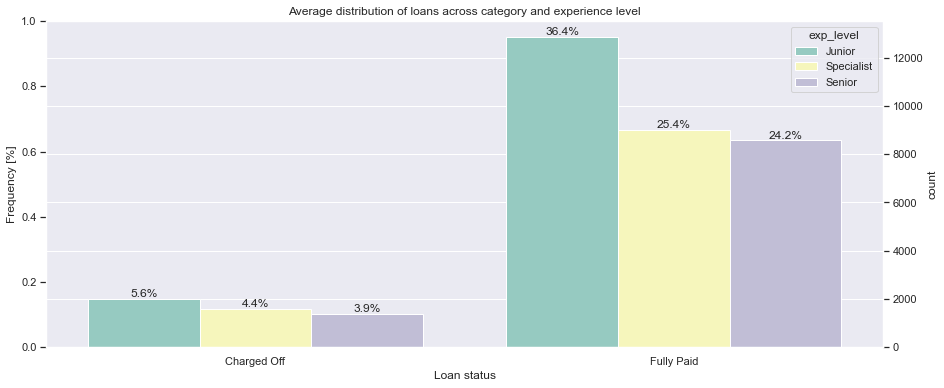

In [52]:
plt_frequency_graphs("loan_status",master,'Loan status','Average distribution of loans across category and experience level','exp_level')

#### Junior experienced(<=3) people are getting more loans and they are poeple with more default status

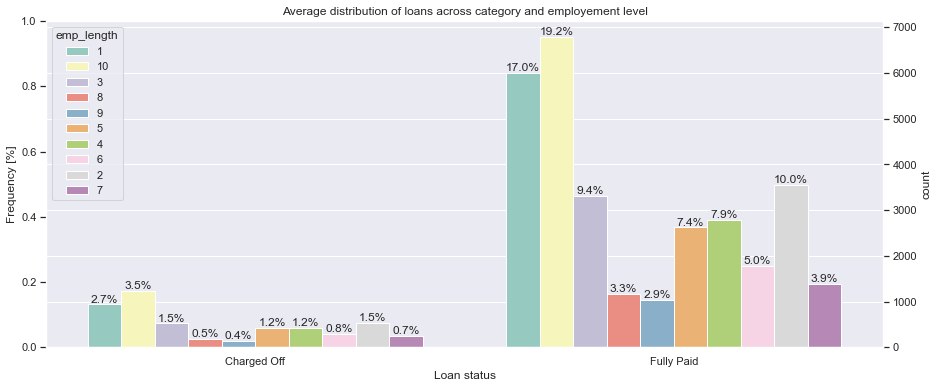

In [53]:
plt_frequency_graphs("loan_status",master,'Loan status','Average distribution of loans across category and employement level','emp_length')

#### People with 1 experience level and experience level of 10 are having more chances of default

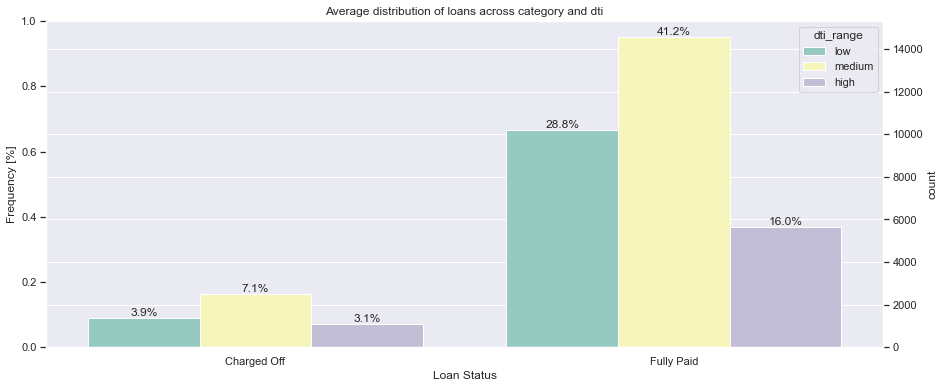

In [54]:
plt_frequency_graphs("loan_status",master,'Loan Status','Average distribution of loans across category and dti','dti_range')

#### People with medium(>10.00 and <= 20.00) debt to income are having more chances of default

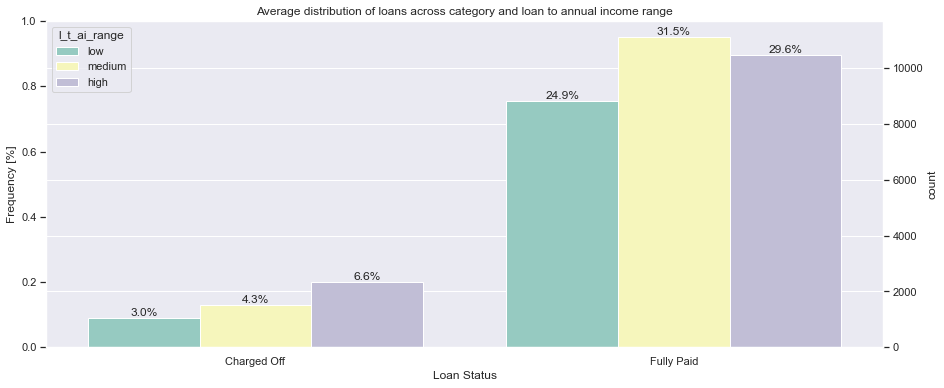

In [55]:
plt_frequency_graphs("loan_status",master,'Loan Status','Average distribution of loans across category and loan to annual income range','l_t_ai_range')

#### People with high loan to income ratio (>0.20) are having more chance of  default

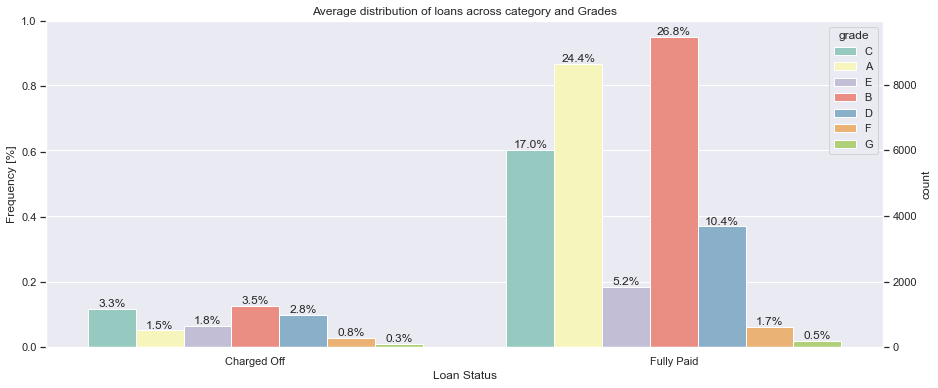

In [56]:
plt_frequency_graphs("loan_status",master,'Loan Status','Average distribution of loans across category and Grades','grade')

#### People with grades B,C are having more chances of default. People with grade A are taking loans frequently and having less default range compared to B,C

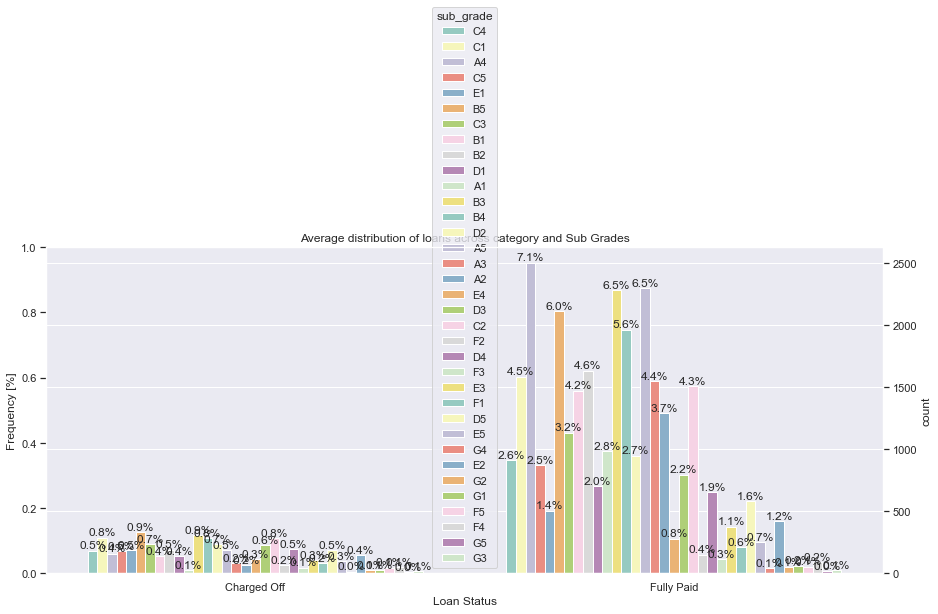

In [57]:
plt_frequency_graphs("loan_status",master,'Loan Status','Average distribution of loans across category and Sub Grades','sub_grade')

##### No much significance stats can be seen for subgrade data related to default

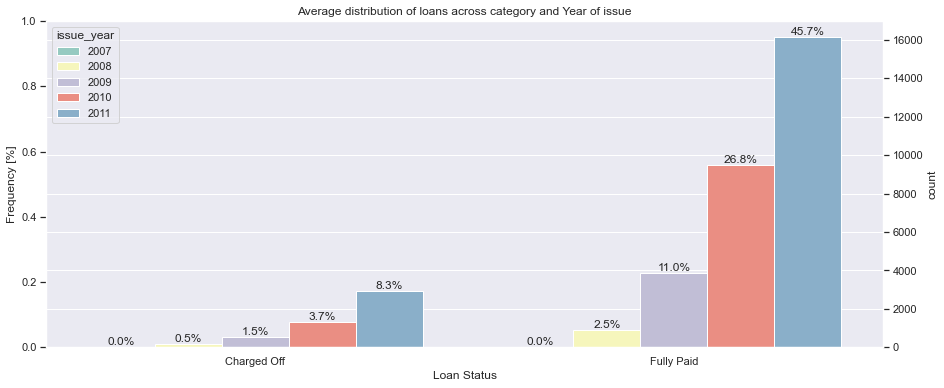

In [58]:
plt_frequency_graphs("loan_status",master,'Loan Status','Average distribution of loans across category and Year of issue','issue_year')

#### Default loans are getting increased from 2008 and enoromous increase can be seen from 2010 to 2011

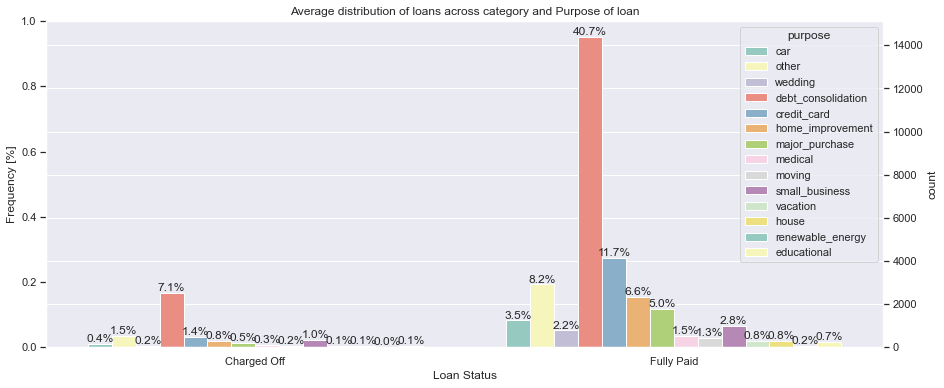

In [59]:
plt_frequency_graphs("loan_status",master,'Loan Status','Average distribution of loans across category and Purpose of loan','purpose')

#### More default loans can be seen for the loans taken with purpose 'debt_consolidation'

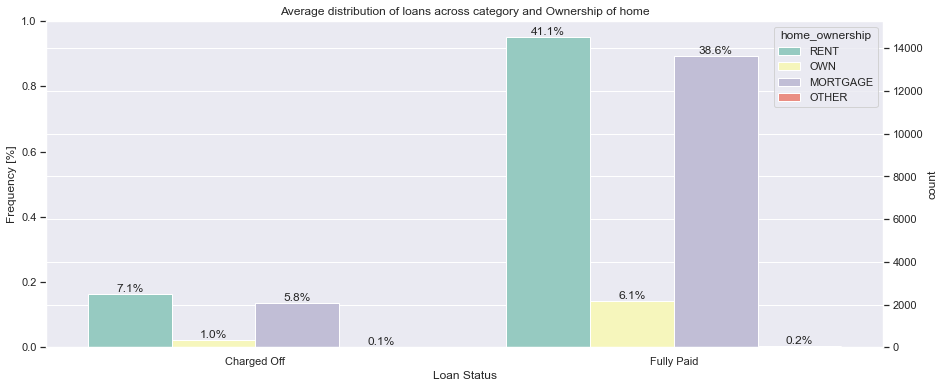

In [60]:
plt_frequency_graphs("loan_status",master,'Loan Status','Average distribution of loans across category and Ownership of home','home_ownership')

#### People with rented and mortaged loans are more and they are having more chances of default

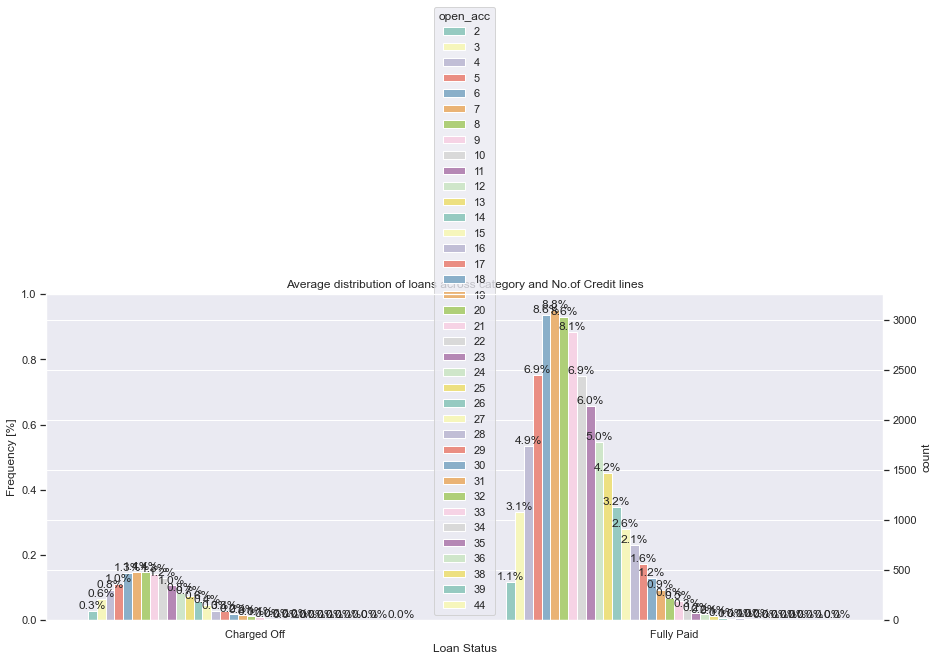

In [61]:
plt_frequency_graphs("loan_status",master,'Loan Status','Average distribution of loans across category and No.of Credit lines','open_acc')

#### No.Of credit lines is not having much significance in analysis for default loan status

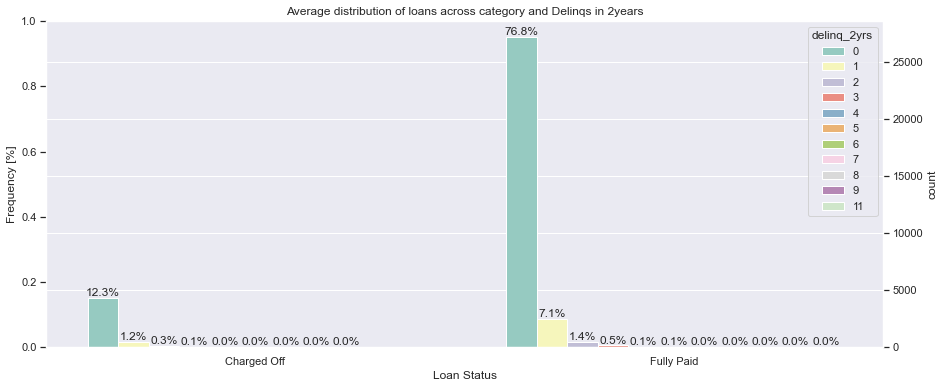

In [62]:
plt_frequency_graphs("loan_status",master,'Loan Status','Average distribution of loans across category and Delinqs in 2years','delinq_2yrs')

#### Zero Delinq for 2 years are having more loans and they are having more default status

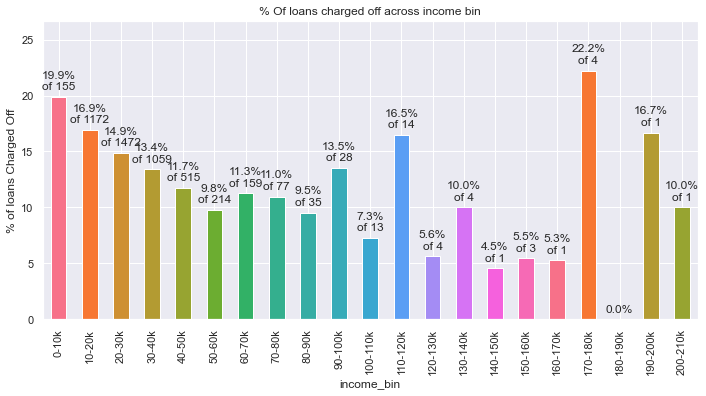

In [63]:
plt.figure(figsize=(10,5))
grp = master.loc[master['income_bin']<21].groupby(['loan_status','income_bin'])['income_bin'].count()
cnt = master.loc[master['income_bin']<21].groupby('income_bin')['income_bin'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of loans Charged Off')
showLabels(ax, grp['Charged Off'].to_dict())
plt.margins(0.2, 0.2)
plt.tight_layout()
plt.title('% Of loans charged off across income bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])
plt.show()

#### People with annual income balance 170-180k,0-10k ,110-120k are having more default status

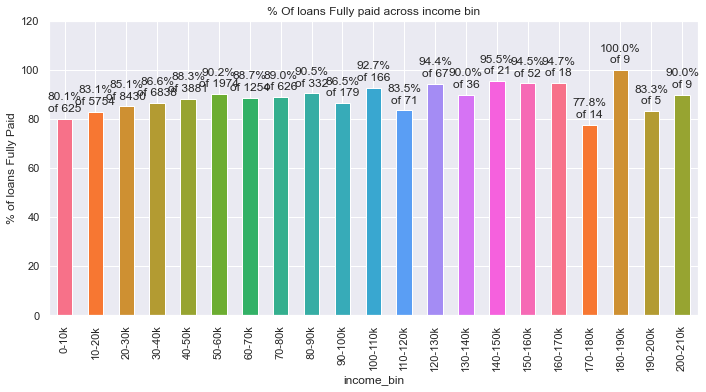

In [64]:
plt.figure(figsize=(10,5))
grp = master.loc[master['income_bin']<21].groupby(['loan_status','income_bin'])['income_bin'].count()
cnt = master.loc[master['income_bin']<21].groupby('income_bin')['income_bin'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Fully Paid'].plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of loans Fully Paid')
showLabels(ax, grp['Fully Paid'].to_dict())
plt.margins(0.2, 0.2)
plt.tight_layout()
plt.title('% Of loans Fully paid across income bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])
plt.show()

#### Mostly all range of income people having similar full paid status

#### Overall analysis from above graphs
    1. Less experience people have high chances of default
    2. People lying in medium dti range have high chances of default
    3. People having high loan to income ratio having high chances of default
    4. Peoples in the grade B,c,D are having high chances of default
    5. Sub grades doesnt show any significance in default compared to Fully paid so, it is not much useful for us in this analysis
    6. Mostly people started defaulting loan from 2009 and increasing.
    7. Loans with purpose 'debt_consolidation', 'other', 'credit_card' are having more chances of default
    8. People who are having their Rented/Mortage ownership of home are having high chances of loan default
    9. From graph we can see that no.of credit lines doesnt have much impact in default status of loan
    10. Since, no.of delinqs in 2years is not so useful in our analysis, Since more defaults are having 0 delinqus in 2years
    11. People with income around the ranges 0-10k (Less income) are more chances of default

### Bi Varient Analysis

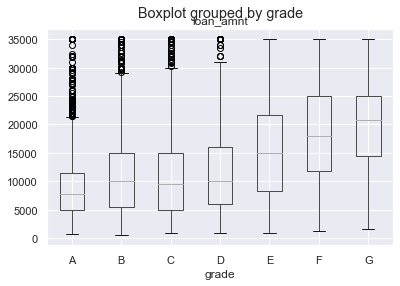

In [65]:
### Here we start working on different variables how they are related to each other and insights with them
master.boxplot(column='loan_amnt', by='grade')
plt.show()

#### Here we can observe that people with low grade are taking more loan amount

Text(0.5, 1.0, 'Verification status for different loan status across loan amount')

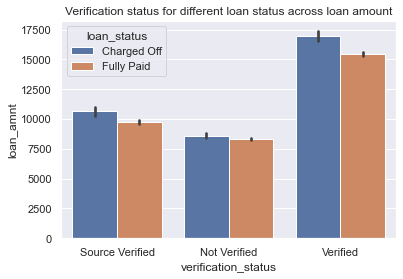

In [66]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master, estimator=np.mean)
plt.title('Verification status for different loan status across loan amount')

##### Loans with higher amount are verified but still they are more charged off

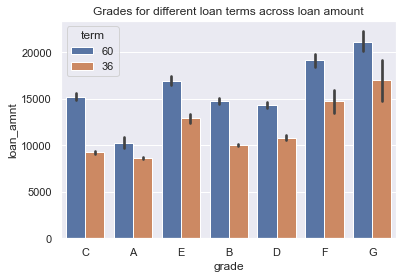

In [67]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=master, estimator=np.mean)
plt.title('Grades for different loan terms across loan amount')
plt.show()

#### People with low grade are taking more amount of loan for higher tenure

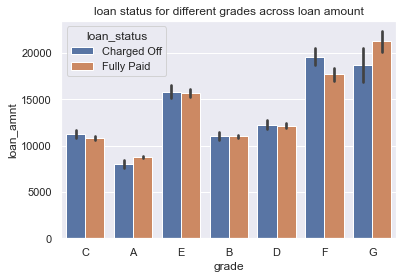

In [74]:
sns.barplot(x='grade', y='loan_amnt', hue="loan_status", data=master, estimator=np.mean)
plt.title('loan status for different grades across loan amount')
plt.show()

#### People with low grades takes more loan amount and are the people having more chances of defaults

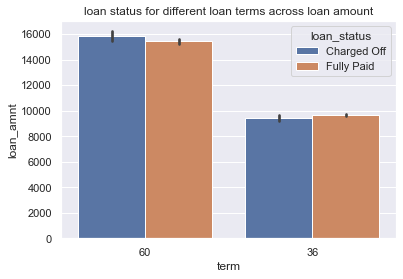

In [75]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=master, estimator=np.mean)
plt.title('loan status for different loan terms across loan amount')
plt.show()

#### People with high term are ghaving more chances of default

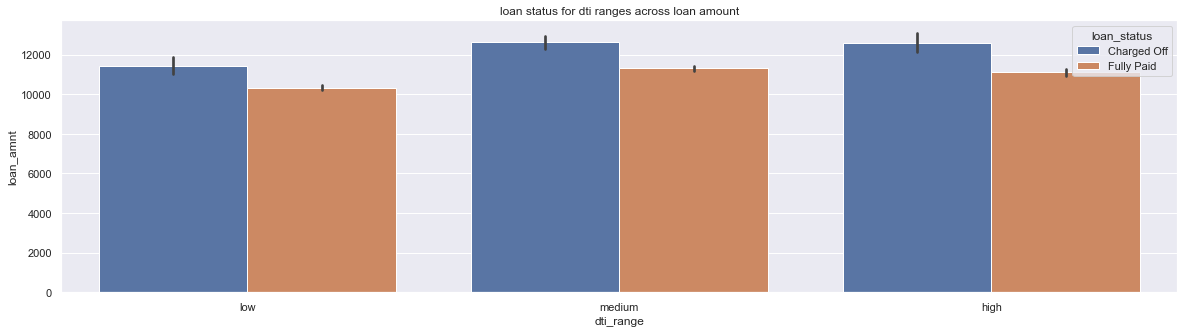

In [76]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_range', y='loan_amnt', hue='loan_status',data=master, estimator=np.mean)
plt.title('loan status for dti ranges across loan amount')
plt.show()

#### People with medim & high debt to income ratio are having more chances of default

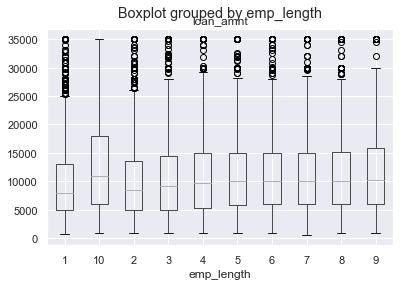

In [333]:
master.boxplot(column='loan_amnt', by='emp_length')
plt.show()

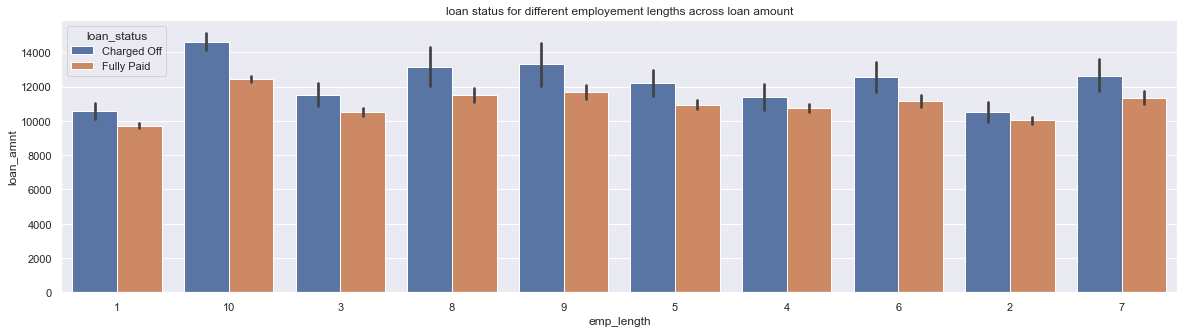

In [77]:
plt.figure(figsize=(20,5))
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status',data=master, estimator=np.mean)
plt.title('loan status for different employement lengths across loan amount')
plt.show()

#### People with more experience level around 8-10 are having high chances of default by taking more amount of loan

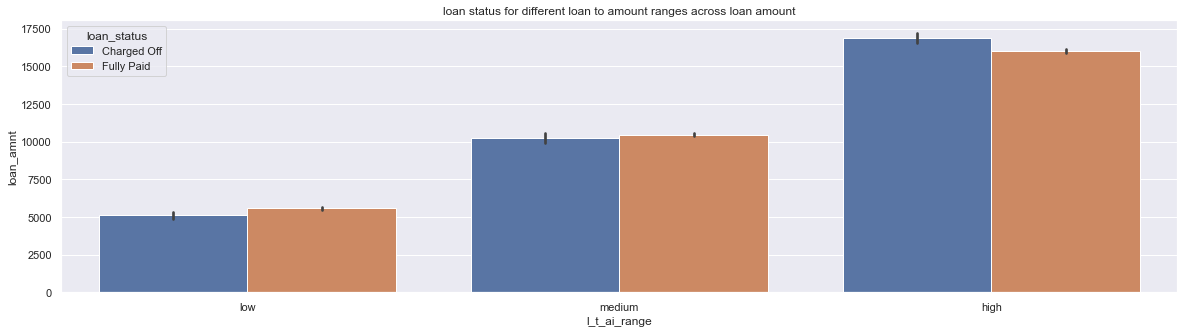

In [78]:
plt.figure(figsize=(20,5))
sns.barplot(x='l_t_ai_range', y='loan_amnt', hue='loan_status',data=master, estimator=np.mean)
plt.title('loan status for different loan to amount ranges across loan amount')
plt.show()

#### Peole with high income to loan ratio are having high chances of default by taking more amount of loan

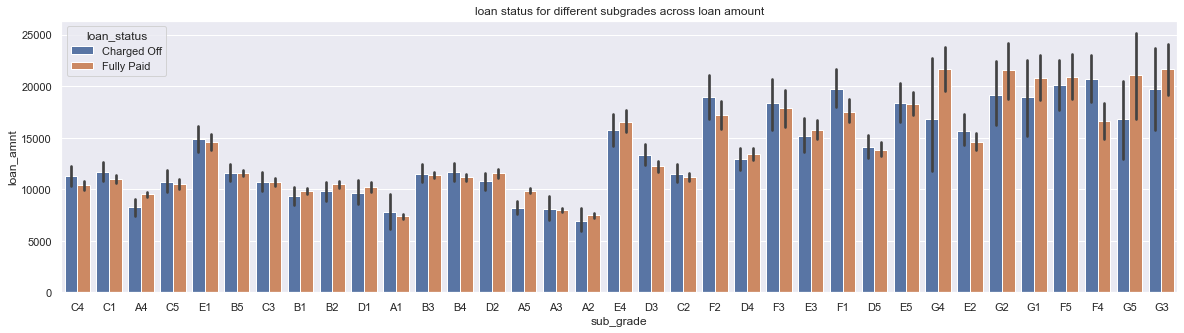

In [79]:
plt.figure(figsize=(20,5))
sns.barplot(x='sub_grade', y='loan_amnt', hue='loan_status',data=master, estimator=np.mean)
plt.title('loan status for different subgrades across loan amount')
plt.show()

#### people with sub grades with prefix E,F,G are having the more chances of default by taking more amount of loan

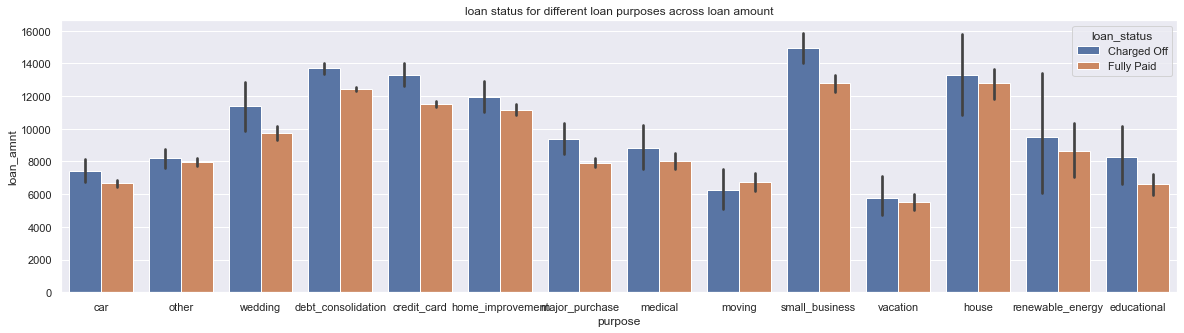

In [80]:
plt.figure(figsize=(20,5))
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status',data=master, estimator=np.mean)
plt.title('loan status for different loan purposes across loan amount')
plt.show()

#### People who took loan for the purpose of 'small_business', 'debt_conslidation', 'credit_card' are most likely to have chance of default by taking more amount of loan

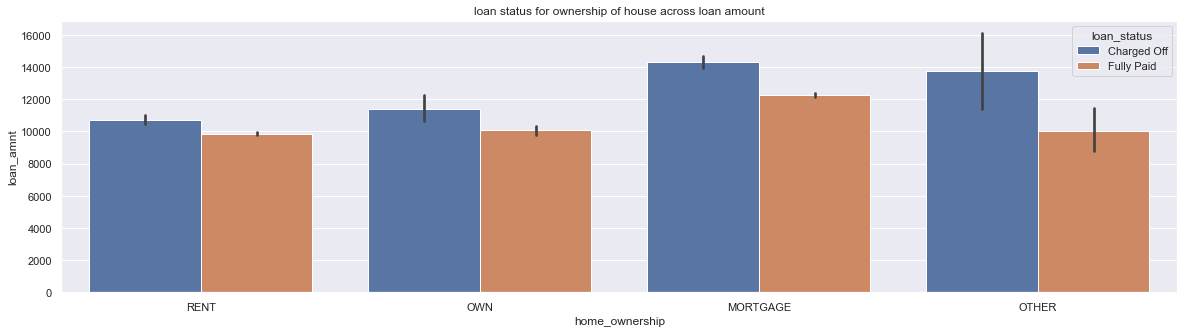

In [81]:
plt.figure(figsize=(20,5))
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status',data=master, estimator=np.mean)
plt.title('loan status for ownership of house across loan amount')
plt.show()

#### People with house of other and mortage took more amount of loan and likely to default more

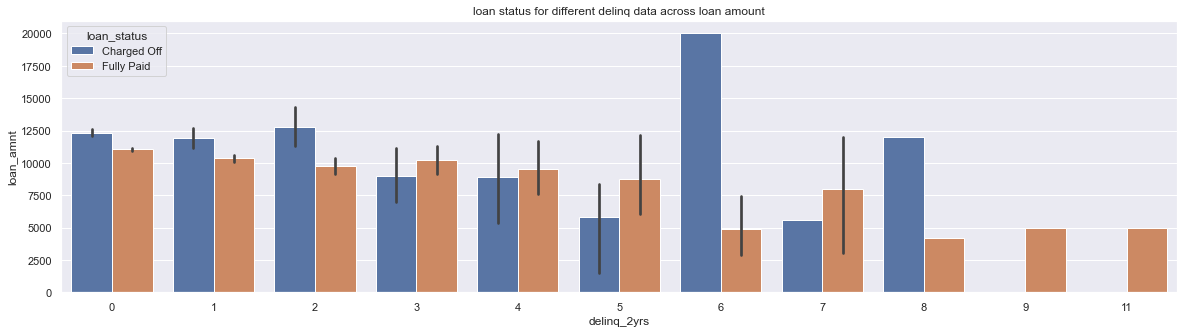

In [82]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='loan_status',data=master, estimator=np.mean)
plt.title('loan status for different delinq data across loan amount')
plt.show()

#### People with 6 delinq in span of 2 years have chances of taking more loan and makes loan default

In [344]:
#### Now let us see how house ownership effects our analysis
def plt_frequency_subplot(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6,axis=None):
    ncount = len(master)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax =sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3",ax=axis)
    plt.title(title)
    plt.xlabel(x_label)

    
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    #ax2.grid(None)

def create_subplot(x_var,data_df,x_label,title,hue_var=None,palette_var='Dark2',rot_flag=0,axis=None):
    ncount = len(master)
    if axis is None:
        axis= plt.gca()  
    bp = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette=palette_var,ax=axis)
    if(rot_flag==1):
        axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    axis.set_title(title)
    axis.set_xlabel(x_label)
    axis.set_ylabel('Frequency [%]')
    for p in axis.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        axis.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    return bp

<AxesSubplot:title={'center':'Distribution of Owned Asset on DTI'}, xlabel='Loan Status', ylabel='Frequency [%]'>

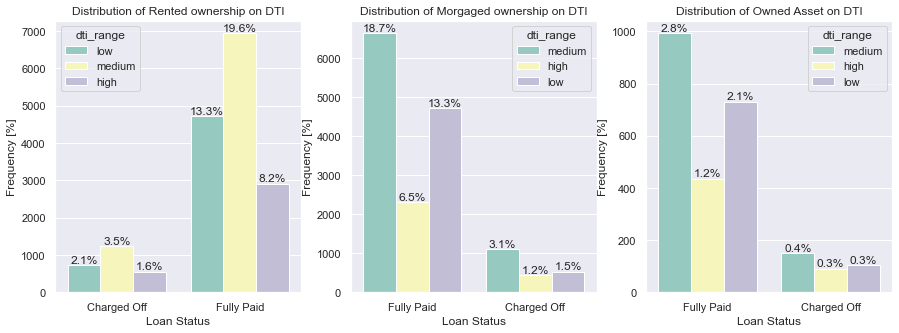

In [376]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
create_subplot('loan_status',master[master['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on DTI','dti_range','Set3',0, axs[0])
create_subplot('loan_status',master[master['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on DTI','dti_range','Set3',0, axs[1])   
create_subplot('loan_status',master[master['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on DTI','dti_range','Set3',0, axs[2])   

#### 
* For Rented House `Medium` DTI is having more chances of default
* For Mortaged House `Medium` DTI is having more chances of default
* For Own House `Medium` DTI is having more chances of default

<AxesSubplot:title={'center':'Distribution of Owned Asset on Loan to Annual Income'}, xlabel='Loan Status', ylabel='Frequency [%]'>

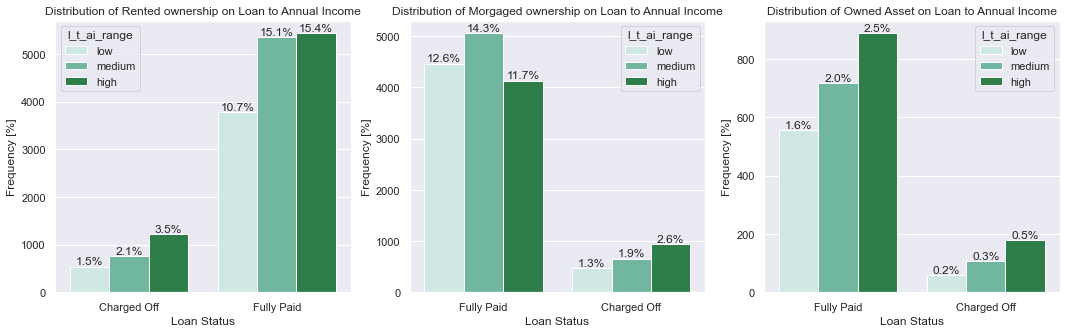

In [377]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',master[master['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Loan to Annual Income','l_t_ai_range','BuGn',0, axs[0])
create_subplot('loan_status',master[master['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Loan to Annual Income','l_t_ai_range','BuGn',0, axs[1])   
create_subplot('loan_status',master[master['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Loan to Annual Income','l_t_ai_range','BuGn',0, axs[2])   

#### 
* For Rented House `High` loan to Income ratio is having more chances of default
* For Mortaged House `High` loan to Income ratio is having more chances of default
* For Own House `High` loan to Income ratio is having more chances of default

<AxesSubplot:title={'center':'Distribution of Owned Asset on Experience level'}, xlabel='Loan Status', ylabel='Frequency [%]'>

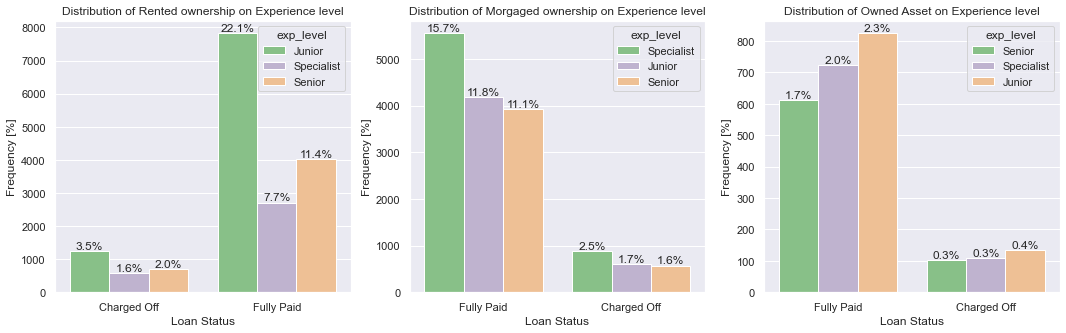

In [378]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',master[master['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Experience level','exp_level','Accent',0, axs[0])
create_subplot('loan_status',master[master['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Experience level','exp_level','Accent',0, axs[1])   
create_subplot('loan_status',master[master['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Experience level','exp_level','Accent',0, axs[2])   

#### 
* For Rented House Juniors experience level employees are having more chances of default
* For Mortaged House Specialist experience level employees are having more chances of default
* For Own House Juniors experience level employees are having more chances of default

<AxesSubplot:title={'center':'Distribution of Owned Asset on Grades'}, xlabel='Loan Status', ylabel='Frequency [%]'>

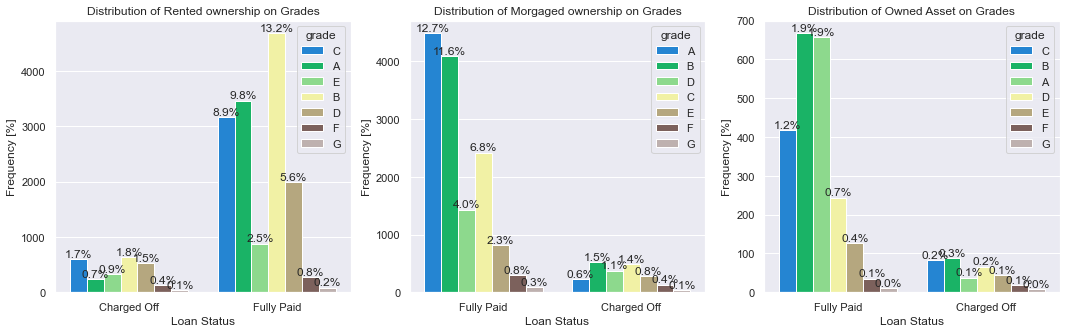

In [379]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',master[master['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Grades','grade','terrain',0, axs[0])
create_subplot('loan_status',master[master['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Grades','grade','terrain',0, axs[1])   
create_subplot('loan_status',master[master['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Grades','grade','terrain',0, axs[2])

#### 
* For Rented House B, C grade people are having more chances of default
* For Mortaged House B, C grade people are having more chances of default
* For Own House B, C grade people are having more chances of default

#### Overall insights how ownership of house effects analysis
    1. Rented House
        A. Debt to Income ratio : Medium DTI is having more chances of default
        B. Loan to Annual Income : High loan to Income ratio is having more chnaces of default
        C. Experience level : Juniors are having more chances of default
        D. Grades : B, C grade people are having more chances of default
    2. Mortaged House
        A. Debt to Income ratio : Medium DTI is having more chances of default
        B. Loan to Annual Income : High loan to Income ratio is having more chnaces of default
        C. Experience level : Specialist are having more chances of default
        D. Grades : B, C grade people are having more chances of default
    3. Own House
        A. Debt to Income ratio : Medium DTI is having more chances of default
        B. Loan to Annual Income : High loan to Income ratio is having more chnaces of default
        C. Experience level : Junior are having more chances of default
        D. Grades : B, C grade people are having more chances of default

#### Lets make verified and source verified as verified and lets see how it effects our analysis

In [346]:
master['verification_status']= master['verification_status'].apply(lambda x :'Verified' if (x=='Verified' or x == 'Source Verified')  else 'Not Verified')

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on DTI'}, xlabel='Loan Status', ylabel='Frequency [%]'>

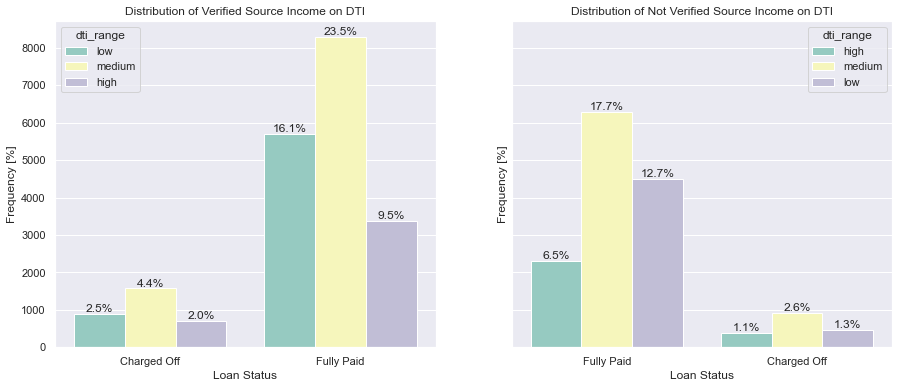

In [380]:
# make figure with subplots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',master[master['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on DTI','dti_range','Set3',0, ax1)
create_subplot('loan_status',master[master['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on DTI','dti_range','Set3',0, ax2)   

#### 
* For Verified Source Income Medium Debt to Income ratio people are having more chances of default
* For Not Verified Source Income Medium Debt to Income ratio people are having more chances of default

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on Loan to Annual Income'}, xlabel='Loan Status', ylabel='Frequency [%]'>

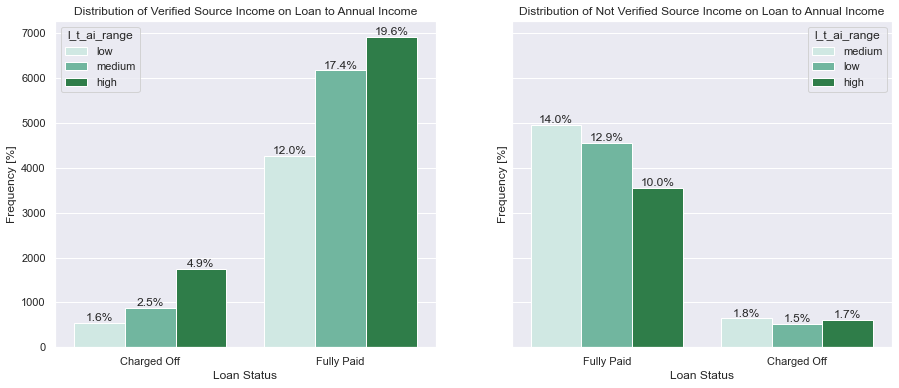

In [381]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',master[master['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Loan to Annual Income','l_t_ai_range','BuGn',0, ax1)
create_subplot('loan_status',master[master['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Loan to Annual Income','l_t_ai_range','BuGn',0, ax2)   

####
* For Verified Source Income High Loan to Income ratio people are having more chances of default
* For Not Verified Source Income Medium Loan to Income ratio people are having more chances of default

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on Experience Level'}, xlabel='Loan Status', ylabel='Frequency [%]'>

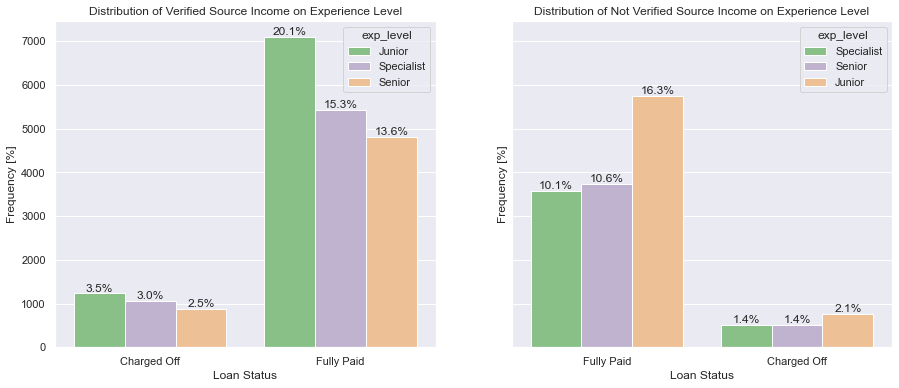

In [382]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',master[master['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Experience Level','exp_level','Accent',0, ax1)
create_subplot('loan_status',master[master['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Experience Level','exp_level','Accent',0, ax2)   

#### 
* For Verified Source Income Junior employement experience level people are having more chances of default
* For Not Verified Source Income Junior employement experience level people are having more chances of default

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on Employement years of experience'}, xlabel='Loan Status', ylabel='Frequency [%]'>

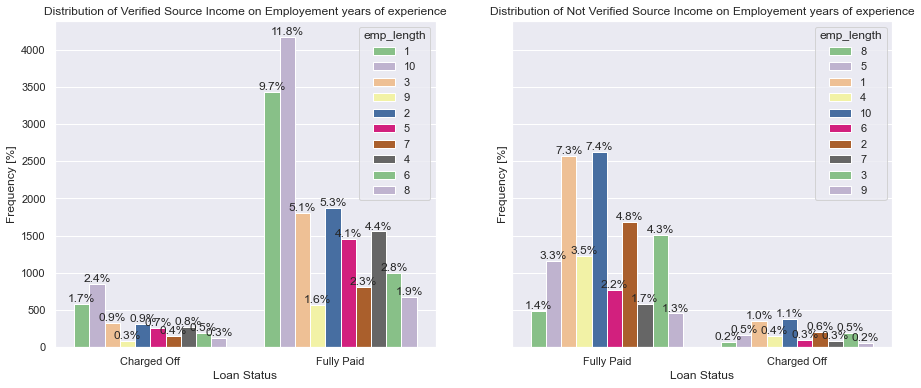

In [384]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',master[master['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Employement years of experience','emp_length','Accent',0, ax1)
create_subplot('loan_status',master[master['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Employement years of experience','emp_length','Accent',0, ax2)   

#### 
* For Verified Source Income 1,10 years of experience employees are having more chances of default
* For Not Verified Source Income 1,10 years of experience employees are having more chances of default

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on Grades'}, xlabel='Loan Status', ylabel='Frequency [%]'>

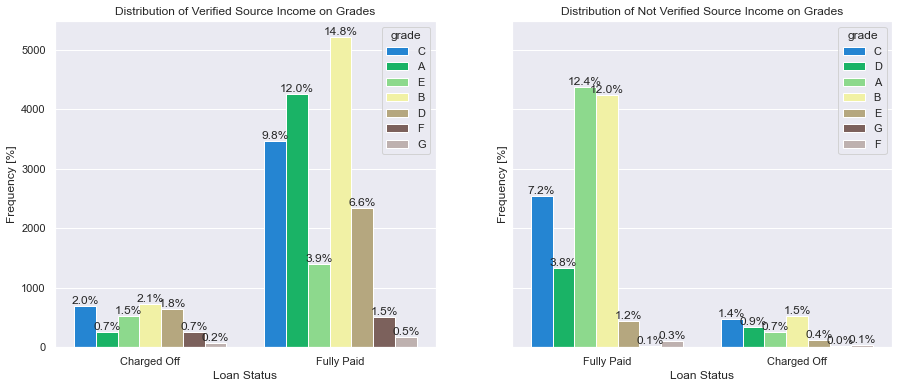

In [383]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',master[master['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Grades','grade','terrain',0, ax1)
create_subplot('loan_status',master[master['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Grades','grade','terrain',0, ax2)

#### 
* For Verified Source Income B,c Grade people are having more chances of default
* For Not Verified Source Income B,C graded people are having more chances of default

#### From the graphs we can provide the following insights for Verified and Non Verified status
    1. Verified Status
        A. Debt to Income ratio : Medium DTI is having more chances of default
        B. Loan to Annual Income : High loan to Income ratio is having more chnaces of default
        C. Experience level : Juniors are having more chances of default
        D. Grades : B, C grade people are having more chances of default
        E. No.Of Years Experience: 1, 10 Years of experience are having more chances of default
    2. Not Verified Status
        A. Debt to Income ratio : Medium DTI is having more chances of default
        B. Loan to Annual Income : Medium loan to Income ratio is having more chnaces of default
        C. Experience level : Juniors are having more chances of default
        D. Grades : B, C grade people are having more chances of default
        E. No.Of Years Experience: 1, 10 Years of experience are having more chances of default

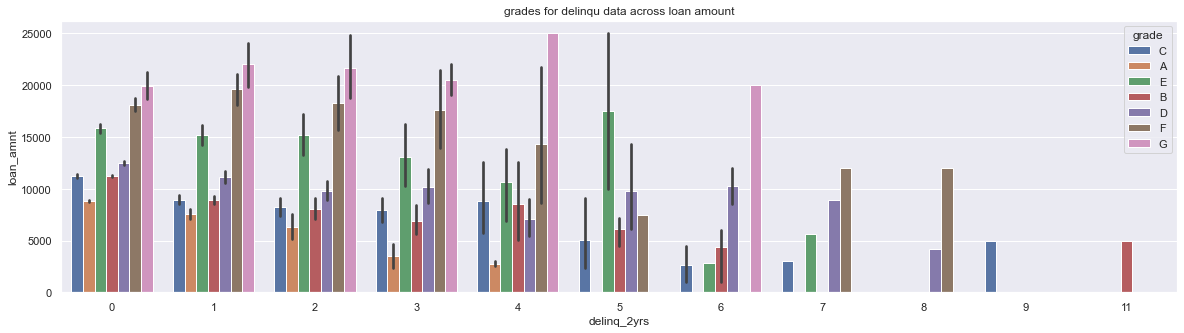

In [83]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=master, estimator=np.mean)
plt.title('grades for delinqu data across loan amount')
plt.show()

#### Not many loans receive invstment with higher number of delinquencies(>3). Despite the low loan amount request, these loans are considered risky and are not invested much in.
#### Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies.

### Correlation among variables

In [85]:
# Filtering all the numerical values to understand their correlation
laons_corr_df = master.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate_float','installment','emp_length','annual_inc','dti','l_t_ai']) 
cor = laons_corr_df.corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_float,installment,annual_inc,dti,l_t_ai
loan_amnt,1.000,0.982,0.952,0.300,0.931,0.259,0.063,0.616
funded_amnt,0.982,1.000,0.971,0.305,0.957,0.255,0.063,0.604
funded_amnt_inv,0.952,0.971,1.000,0.295,0.923,0.246,0.067,0.587
int_rate_float,0.300,0.305,0.295,1.000,0.276,0.047,0.111,0.213
installment,0.931,0.957,0.923,0.276,1.000,0.256,0.054,0.556
annual_inc,0.259,0.255,0.246,0.047,0.256,1.000,-0.121,-0.229
dti,0.063,0.063,0.067,0.111,0.054,-0.121,1.000,0.149
l_t_ai,0.616,0.604,0.587,0.213,0.556,-0.229,0.149,1.000


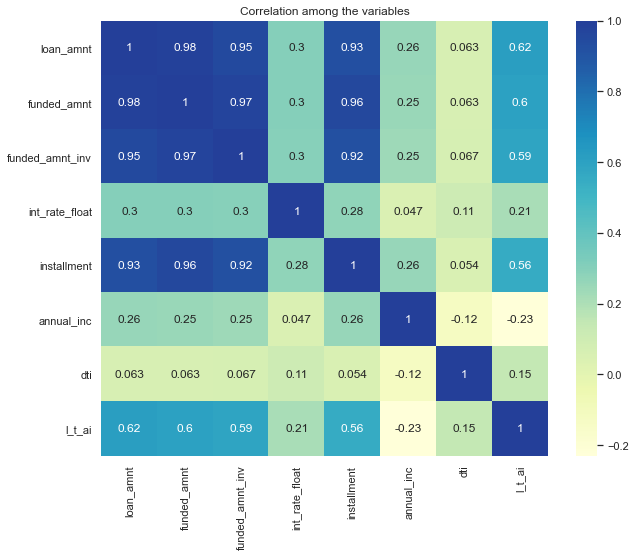

In [86]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True, center=0.5)
plt.title('Correlation among the variables')
plt.show()

#### Here  
    High corelated:
    1. loan amount is highly corelated with funded_amt, funded_aqmt_inv, installment, income to amount respectively from high to low
    2. funded_amt_inv is higly corelated with funded_amt, loan_amt, installement, income to loan ratio respectively from high to low
    3. installment is corelated with funded_amt, loan_amt, funded_amt_inv, income to loan ratio respectively from high to low
    4. income to loan ratio is high corelated with loan_amt, funded_amt_inv, installement respectively from high to low
    
    Low Corelated:
    1. Annual income is negative or less corelated with loan to income ratio and debt to income 

### Conclusion

#### Lending needs to take care of following characters while considering loan
* Debt, Loan to Income ratio
* Grade
* Purpose of loan 
* Income


#### Following are conclusions that should be considered as per the above analysis while providing loan to the person

* People with low grade are taking more amount of loans for long tenure are having more chances of default. So, better to give loan who are having the A grade.
* People who are taking loans with the purpose of debt_considellation, credit_card, others are having more chances of default
* people who are having own houses are having less chances of default
* People having less income and more debts are having high chances of default
* People with less delinques are having less chnaces of default